In [2]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import math
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import datetime as dt
%matplotlib inline
import os
import sys
from tqdm import tqdm
sys.path.append('/home/basil/Desktop/cape_mend_SM_LCS/datatools')
import datatools as tools
import cmocean as cm
from scipy.interpolate import griddata

In [3]:
path_to_data = '/media/basil/Elements/data/Davis/float_data/Greenland_Floats/Greenland_Floats/'
float_names = ['F9313','F10052']

In [3]:
#270 stuff

to_hd = '/media/basil/Elements/data/' 
grid = xr.open_dataset(to_hd+'llc270/llc270_grid_test.nc')
llc270_data = '/media/basil/Elements/data/llc270/'
model_salt_files, model_salt_filepath = tools.get_data_paths_from_binary(llc270_data,'SALT',file_end='nc')
model_salt = xr.open_mfdataset(model_salt_filepath)
model_temp_files, model_temp_filepath = tools.get_data_paths_from_binary(llc270_data,'THETA',file_end='nc')
model_temp = xr.open_mfdataset(model_temp_filepath)
salt = model_salt['SALT'].isel(tile=10)#.rename({'j':'i','i':'j'})
temp = model_temp['THETA'].isel(tile=10)
model_gridded = xr.merge([temp,salt,grid.isel(tile=10)])#.rename({'XC':'YC','YC':'XC'})])
model_gridded = model_gridded.set_coords({'XC','YC'})

In [5]:
#1080 stuff
i=0
llc1080_path = '/media/basil/Elements/data/L1_llc1080/'
var = 'nc_files'
llc1080_files, llc1080_filepaths = tools.get_data_paths_from_binary(llc1080_path,var,file_end='nc')
llc1080_data = xr.open_mfdataset(llc1080_filepaths).set_coords({'longitude','latitude'})


year = llc1080_files[i].split('.')[1][0:4]
month = llc1080_files[i].split('.')[1][4:6]
day = 15
time = [datetime(int(year),int(month),int(day))]   

In [15]:
data_files, data_filepath = tools.get_data_paths_from_binary(path_to_data,float_names[1],file_end='nc')
data_1 = xr.open_mfdataset(data_filepath[0])
data_2 = xr.open_mfdataset(data_filepath[1])

In [8]:
#data = xr.open_mfdataset(data_filepath[i])
year = data_1.attrs['year']
month = data_1.attrs['month']
day = data_1.attrs['day']
hour = data_1.attrs['hour']
begining_day = datetime(int(year),int(month),int(day),int(hour))
time = begining_day 
data_1['time'] = time
data_1

<xarray.Dataset>
Dimensions:                (records: 334)
Dimensions without coordinates: records
Data variables:
    depth                  (records) float32 dask.array<chunksize=(334,), meta=np.ndarray>
    practical_salinity     (records) float32 dask.array<chunksize=(334,), meta=np.ndarray>
    potential_temperature  (records) float32 dask.array<chunksize=(334,), meta=np.ndarray>
    time                   datetime64[ns] 2022-08-21T20:00:00
Attributes:
    longitude:     -52.0948032
    latitude:      69.277842
    year:          2022
    month:         8
    day:           21
    hour:          20
    minute:        57
    source:        Dive_001.json
    project_name:  Oceans Melting Greenland

In [16]:
i=0
data = xr.open_mfdataset(data_filepath[i])
data_1 = xr.open_mfdataset(data_filepath[1])
year = data_1.attrs['year']
month = data_1.attrs['month']
day = data_1.attrs['day']
hour = data_1.attrs['hour']
begining_day = datetime(int(year),int(month),int(day),int(hour))
time = begining_day 
data_1['time'] = time
data_1 = data_1.set_coords('time')
data_1.coords['records'] = np.array(data_1.depth).round(1)
data_1 = data_1.drop_vars('depth')
data_1 = data_1.rename({'records':'depth'})
data_1.close()

In [17]:
#processing float data into workable format
lat_points = []
lon_points = []

for i in tqdm(range(0,len(data_files))):
    data = xr.open_mfdataset(data_filepath[i])
    year = data.attrs['year']
    month = data.attrs['month']
    day = data.attrs['day']
    hour = data.attrs['hour']
    begining_day = datetime(int(year),int(month),int(day),int(hour))
    time = begining_day
    data['time'] = time
    data = data.set_coords({'time'})
    data.coords['records'] = np.array(data.depth).round(1)
    data = data.drop_vars('depth')
    data = data.rename({'records':'depth'})
    lat_points.append(data.attrs['latitude'])
    lon_points.append(data.attrs['longitude'])
    data.to_netcdf('/media/basil/Elements/data/Davis/float_data/Greenland_Floats/processed_float_data/'+float_names[1]+'/float_'+float_names[1]+'_'+str(i).zfill(4)+'.nc')

100%|███████████████████████████████████████████| 47/47 [00:01<00:00, 26.30it/s]


In [18]:
path = '/media/basil/Elements/data/Davis/float_data/Greenland_Floats/'
data_files_sub, data_filepath_sub = tools.get_data_paths_from_binary(path,'processed_float_data/'+float_names[1],file_end='nc')
data_concat = xr.open_mfdataset(data_filepath_sub,combine='nested',concat_dim=['time'])


In [19]:
data_concat['lat'] = lat_points
data_concat['lon'] = lon_points

<xarray.DataArray 'lat' (lat: 69)>
array([69.277842, 69.280779, 69.286794, 69.285086, 69.300176, 69.300365,
       69.305346, 69.314532, 69.319862, 69.31528 , 69.313733, 69.313718,
       69.310123, 69.306197, 69.29659 , 69.268053, 69.242992, 69.22097 ,
       69.221763, 69.22068 , 69.216401, 69.292418, 69.274   , 69.281353,
       69.267733, 69.26606 , 69.249932, 69.222089, 69.21508 , 69.249963,
       69.216763, 69.194933, 69.178614, 69.202904, 69.147599, 69.09653 ,
       69.065827, 69.075288, 69.044481, 69.021461, 69.020225, 69.030782,
       69.019673, 69.027872, 69.023558, 69.027841, 69.022845, 69.022305,
       69.026657, 69.02609 , 69.018184, 69.007797, 68.995226, 68.996011,
       68.984867, 68.993774, 68.95275 , 68.9767  , 69.006774, 69.001185,
       69.000407, 68.997403, 68.998021, 69.01099 , 69.026052, 69.02923 ,
       69.046612, 69.071798, 69.037613])
Coordinates:
  * lat      (lat) float64 69.28 69.28 69.29 69.29 ... 69.03 69.05 69.07 69.04

In [20]:
data_concat.to_netcdf(path+float_names[1]+'processed.nc')

/tmp/ipykernel_4626/2827932899.py:1: UserWarning: Times can't be serialized faithfully to int64 with requested units 'days since 2023-08-19T12:00:00'. Serializing with units 'hours since 2023-08-19T12:00:00' instead. Set encoding['dtype'] to floating point dtype to serialize with units 'days since 2023-08-19T12:00:00'. Set encoding['units'] to 'hours since 2023-08-19T12:00:00' to silence this warning .
  data_concat.to_netcdf(path+float_names[1]+'processed.nc')


In [5]:
data_concat['lat'] = 

<xarray.Dataset>
Dimensions:                (depth: 1549, time: 69)
Coordinates:
  * depth                  (depth) float32 0.2 0.3 1.5 1.7 ... 840.8 842.8 844.5
  * time                   (time) datetime64[ns] 2022-08-21T20:00:00 ... 2023...
Data variables:
    practical_salinity     (time, depth) float32 dask.array<chunksize=(1, 1549), meta=np.ndarray>
    potential_temperature  (time, depth) float32 dask.array<chunksize=(1, 1549), meta=np.ndarray>
Attributes:
    longitude:     -52.0948032
    latitude:      69.277842
    year:          2022
    month:         8
    day:           21
    hour:          20
    minute:        57
    source:        Dive_001.json
    project_name:  Oceans Melting Greenland

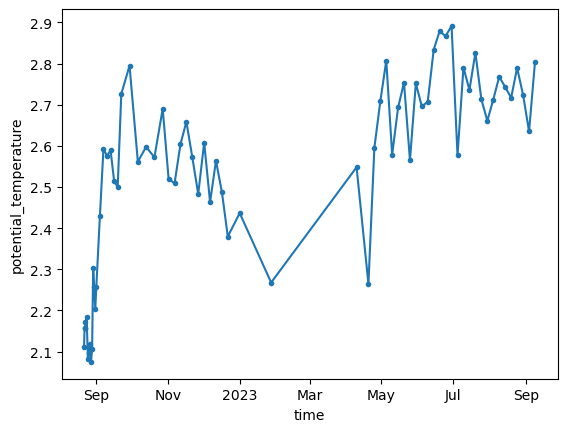

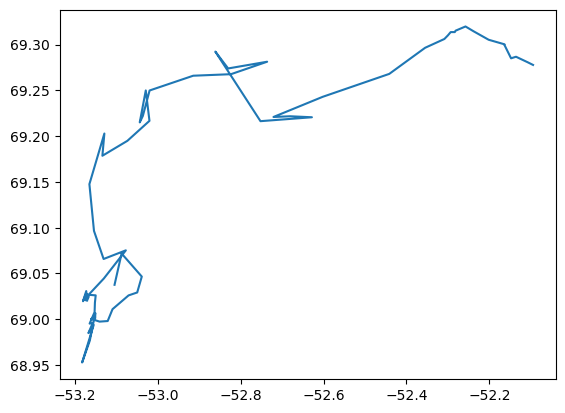

In [72]:
data_concat['potential_temperature'].mean(dim='depth').plot(marker='.')
plt.show()
plt.plot(lon_points,lat_points)

In [31]:
#subsample for 1080
transect_lon = np.array(lon_points)
transect_lat = np.array(lat_points)
lat_cut = llc1080_data.where(np.logical_and(transect_lat.max()+.5>llc1080_data.latitude,transect_lat.min()-.5<llc1080_data.latitude))
lon_cut = lat_cut.where(np.logical_and(transect_lon.max()+.5>lat_cut.longitude,transect_lon.min()-.5<lat_cut.longitude))
tran_cut = lon_cut.dropna(how='all',dim='rows').dropna(how='all',dim='cols')
lon = tran_cut.longitude
lat = tran_cut.latitude
Lon, Lat = lon,lat
lon = tran_cut.isel(iterations=0).longitude
lat = tran_cut.isel(iterations=0).latitude
Lon, Lat = lon,lat
points = np.column_stack([np.ravel(Lon), np.ravel(Lat)])

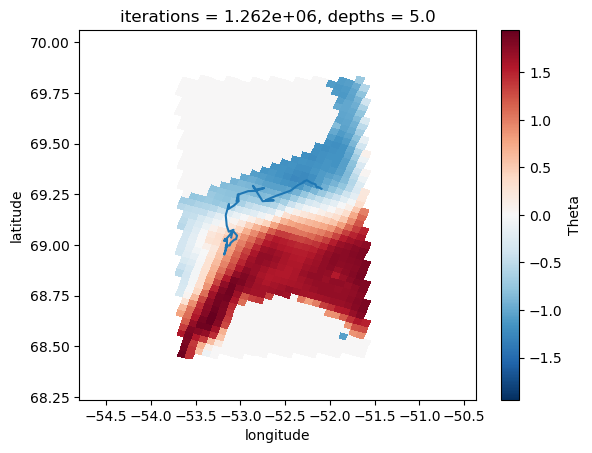

In [35]:
tran_cut['Theta'].isel(iterations=0,depths=0).plot(x='longitude',y='latitude')
plt.plot(transect_lon,transect_lat)

In [37]:
for i in tqdm(range(0,len(tran_cut.iterations))):
    for j in range(0,len(tran_cut['depths'])):
        tran_cut_time_k = tran_cut.isel(iterations=i,depths=j)
        year = llc1080_files[i].split('.')[1][0:4]
        month = llc1080_files[i].split('.')[1][4:6]
        day = 15
        time = [datetime(int(year),int(month),int(day))]        
        k_num = [np.array(tran_cut['depths'])[j]]
        sampled_transect_salt = griddata(points, np.array(tran_cut_time_k['Salt']).ravel(), (transect_lon, transect_lat))
        sampled_transect_temp = griddata(points, np.array(tran_cut_time_k['Theta']).ravel(), (transect_lon, transect_lat))
        sampled_transect_salt = np.reshape(sampled_transect_salt, (1,1,len(transect_lon)))
        sampled_transect_temp = np.reshape(sampled_transect_temp, (1,1,len(transect_lon)))
        salt_data = xr.DataArray(sampled_transect_salt ,coords=[time,k_num,np.arange(len(transect_lon))],dims=['time','depth','x'],name='Salinity_1080')
        temp_data = xr.DataArray(sampled_transect_temp,coords=[time,k_num,np.arange(len(transect_lon))],dims=['time','depth','x'],name='Temperature_1080')
        salt_data.to_netcdf('/media/basil/Elements/data/Davis/float_data/Greenland_Floats/1080_subsampled/'+float_names[0]+'/'+float_names[0]+'_SALT_'+str(i).zfill(4)+'_'+str(j).zfill(2)+'.nc')
        temp_data.to_netcdf('/media/basil/Elements/data/Davis/float_data/Greenland_Floats/1080_subsampled/'+float_names[0]+'/'+float_names[0]+'_THETA_'+str(i).zfill(4)+'_'+str(j).zfill(2)+'.nc')

100%|███████████████████████████████████████████| 84/84 [38:11<00:00, 27.28s/it]


In [141]:
float_path = '/media/basil/Elements/data/Davis/float_data/Greenland_Floats/1080_subsampled/'

llc1080_sub_files, llc1080_sub_filepaths = tools.get_data_paths_from_binary(float_path,'F9313',file_end='nc')
llc1080_subsampled = xr.open_mfdataset(llc1080_sub_filepaths)

In [62]:
llc1080_subsampled

<xarray.Dataset>
Dimensions:           (time: 84, depth: 50, x: 69)
Coordinates:
  * time              (time) datetime64[ns] 2004-01-15 2004-02-15 ... 2010-12-15
  * depth             (depth) float32 5.0 15.0 25.0 ... 5.461e+03 5.906e+03
  * x                 (x) int64 0 1 2 3 4 5 6 7 8 ... 60 61 62 63 64 65 66 67 68
Data variables:
    Salinity_1080     (time, depth, x) float64 dask.array<chunksize=(1, 1, 69), meta=np.ndarray>
    Temperature_1080  (time, depth, x) float64 dask.array<chunksize=(1, 1, 69), meta=np.ndarray>

In [ ]:
# llc1080_subsampled.interp(depth=np.array(data_concat['depth'])).plot()
# plt.gca().invert_yaxis()

In [142]:
llc1080_subsampled = llc1080_subsampled.interp(depth=np.array(data_concat['depth']))

In [143]:
llc1080_subsampled_2005_2006 = llc1080_subsampled.where(np.logical_or(llc1080_subsampled['time.year']==2005,llc1080_subsampled['time.year']==2006)).dropna(dim='time',how='all')
llc1080_subsampled_2009_2010 = llc1080_subsampled.where(np.logical_or(llc1080_subsampled['time.year']==2009,llc1080_subsampled['time.year']==2010)).dropna(dim='time',how='all')

In [144]:
data_concat['time']
llc1080_subsampled_datasel = llc1080_subsampled_2005_2006.sel(time=slice('2005-08','2006-09'))
llc1080_subsampled_datasel_2010 = llc1080_subsampled_2009_2010.sel(time=slice('2009-08','2010-09'))

#llc1080_subsampled.isel()

In [132]:
data_concat['time.month']


<xarray.DataArray 'month' (time: 69)>
array([ 8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,
        9,  9,  9,  9,  9, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 12, 12,
       12, 12, 12, 12,  1,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  6,  6,
        6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  9,
        9])
Coordinates:
  * time     (time) datetime64[ns] 2022-08-21T20:00:00 ... 2023-09-08T05:00:00

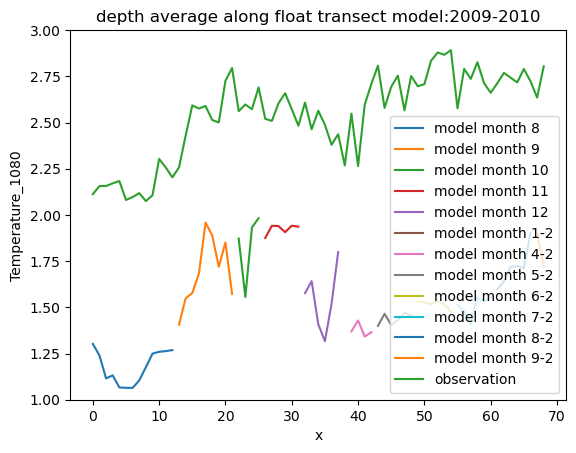

In [163]:
llc1080_subsampled_datasel_2010.isel(time=0,x=slice(0,13)).mean(dim='depth')['Temperature_1080'].plot(label='model month 8')
llc1080_subsampled_datasel_2010.isel(time=1,x=slice(13,13+9)).mean(dim='depth')['Temperature_1080'].plot(label='model month 9')
llc1080_subsampled_datasel_2010.isel(time=2,x=slice(13+9,13+9+4)).mean(dim='depth')['Temperature_1080'].plot(label='model month 10')
llc1080_subsampled_datasel_2010.isel(time=3,x=slice(13+9+4,13+9+4+6)).mean(dim='depth')['Temperature_1080'].plot(label='model month 11')
llc1080_subsampled_datasel_2010.isel(time=4,x=slice(13+9+4+6,13+9+4+6+6)).mean(dim='depth')['Temperature_1080'].plot(label='model month 12')
plt.plot(39,llc1080_subsampled_datasel_2010.isel(time=5,x=39).mean(dim='depth')['Temperature_1080'],label='model month 1-2')
llc1080_subsampled_datasel_2010.isel(time=8,x=slice(13+9+4+6+6+1,13+9+4+6+6+1+4)).mean(dim='depth')['Temperature_1080'].plot(label='model month 4-2')
llc1080_subsampled_datasel_2010.isel(time=9,x=slice(13+9+4+6+6+1+4,13+9+4+6+6+1+4+6)).mean(dim='depth')['Temperature_1080'].plot(label='model month 5-2')
llc1080_subsampled_datasel_2010.isel(time=10,x=slice(13+9+4+6+6+1+4+6,13+9+4+6+6+1+4+6+6)).mean(dim='depth')['Temperature_1080'].plot(label='model month 6-2')
llc1080_subsampled_datasel_2010.isel(time=11,x=slice(13+9+4+6+6+1+4+6+6,13+9+4+6+6+1+4+6+6+6)).mean(dim='depth')['Temperature_1080'].plot(label='model month 7-2')
llc1080_subsampled_datasel_2010.isel(time=12,x=slice(13+9+4+6+6+1+4+6+6+6,13+9+4+6+6+1+4+6+6+6+6)).mean(dim='depth')['Temperature_1080'].plot(label='model month 8-2')
llc1080_subsampled_datasel_2010.isel(time=13,x=slice(13+9+4+6+6+1+4+6+6+6+6,13+9+4+6+6+1+4+6+6+6+6+2)).mean(dim='depth')['Temperature_1080'].plot(label='model month 9-2')

plt.plot(llc1080_subsampled_datasel.x,np.array(data_concat['potential_temperature'].mean(dim='depth')),label='observation')
plt.legend()
plt.title('depth average along float transect model:2009-2010')
plt.ylim(1,3)
plt.savefig('./float_1080_2009_2010.png')

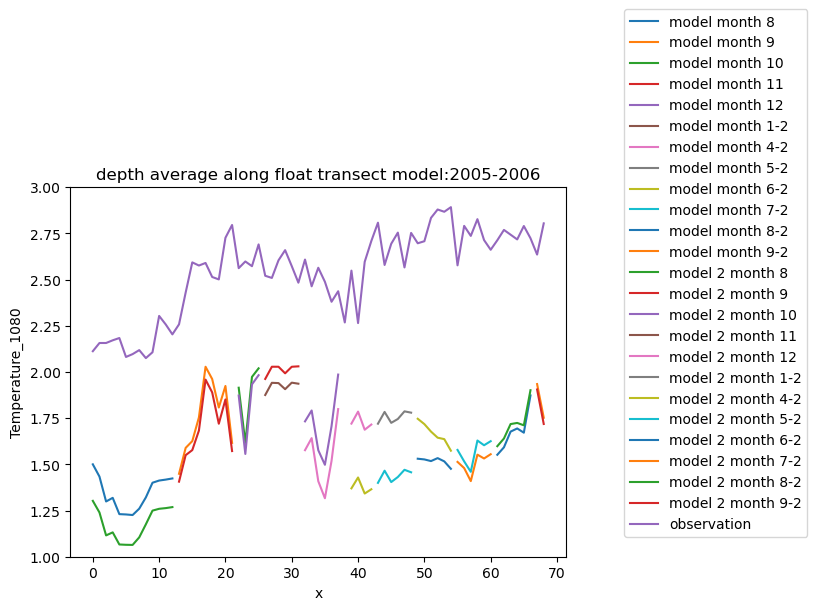

In [168]:
llc1080_subsampled_datasel.isel(time=0,x=slice(0,13)).mean(dim='depth')['Temperature_1080'].plot(label='model month 8')
llc1080_subsampled_datasel.isel(time=1,x=slice(13,13+9)).mean(dim='depth')['Temperature_1080'].plot(label='model month 9')
llc1080_subsampled_datasel.isel(time=2,x=slice(13+9,13+9+4)).mean(dim='depth')['Temperature_1080'].plot(label='model month 10')
llc1080_subsampled_datasel.isel(time=3,x=slice(13+9+4,13+9+4+6)).mean(dim='depth')['Temperature_1080'].plot(label='model month 11')
llc1080_subsampled_datasel.isel(time=4,x=slice(13+9+4+6,13+9+4+6+6)).mean(dim='depth')['Temperature_1080'].plot(label='model month 12')
plt.plot(39,llc1080_subsampled_datasel.isel(time=5,x=39).mean(dim='depth')['Temperature_1080'],label='model month 1-2')
llc1080_subsampled_datasel.isel(time=8,x=slice(13+9+4+6+6+1,13+9+4+6+6+1+4)).mean(dim='depth')['Temperature_1080'].plot(label='model month 4-2')
llc1080_subsampled_datasel.isel(time=9,x=slice(13+9+4+6+6+1+4,13+9+4+6+6+1+4+6)).mean(dim='depth')['Temperature_1080'].plot(label='model month 5-2')
llc1080_subsampled_datasel.isel(time=10,x=slice(13+9+4+6+6+1+4+6,13+9+4+6+6+1+4+6+6)).mean(dim='depth')['Temperature_1080'].plot(label='model month 6-2')
llc1080_subsampled_datasel.isel(time=11,x=slice(13+9+4+6+6+1+4+6+6,13+9+4+6+6+1+4+6+6+6)).mean(dim='depth')['Temperature_1080'].plot(label='model month 7-2')
llc1080_subsampled_datasel.isel(time=12,x=slice(13+9+4+6+6+1+4+6+6+6,13+9+4+6+6+1+4+6+6+6+6)).mean(dim='depth')['Temperature_1080'].plot(label='model month 8-2')
llc1080_subsampled_datasel.isel(time=13,x=slice(13+9+4+6+6+1+4+6+6+6+6,13+9+4+6+6+1+4+6+6+6+6+2)).mean(dim='depth')['Temperature_1080'].plot(label='model month 9-2')

llc1080_subsampled_datasel_2010.isel(time=0,x=slice(0,13)).mean(dim='depth')['Temperature_1080'].plot(label='model 2 month 8')
llc1080_subsampled_datasel_2010.isel(time=1,x=slice(13,13+9)).mean(dim='depth')['Temperature_1080'].plot(label='model 2 month 9')
llc1080_subsampled_datasel_2010.isel(time=2,x=slice(13+9,13+9+4)).mean(dim='depth')['Temperature_1080'].plot(label='model 2 month 10')
llc1080_subsampled_datasel_2010.isel(time=3,x=slice(13+9+4,13+9+4+6)).mean(dim='depth')['Temperature_1080'].plot(label='model 2 month 11')
llc1080_subsampled_datasel_2010.isel(time=4,x=slice(13+9+4+6,13+9+4+6+6)).mean(dim='depth')['Temperature_1080'].plot(label='model 2 month 12')
plt.plot(39,llc1080_subsampled_datasel_2010.isel(time=5,x=39).mean(dim='depth')['Temperature_1080'],label='model 2 month 1-2')
llc1080_subsampled_datasel_2010.isel(time=8,x=slice(13+9+4+6+6+1,13+9+4+6+6+1+4)).mean(dim='depth')['Temperature_1080'].plot(label='model 2 month 4-2')
llc1080_subsampled_datasel_2010.isel(time=9,x=slice(13+9+4+6+6+1+4,13+9+4+6+6+1+4+6)).mean(dim='depth')['Temperature_1080'].plot(label='model 2 month 5-2')
llc1080_subsampled_datasel_2010.isel(time=10,x=slice(13+9+4+6+6+1+4+6,13+9+4+6+6+1+4+6+6)).mean(dim='depth')['Temperature_1080'].plot(label='model 2 month 6-2')
llc1080_subsampled_datasel_2010.isel(time=11,x=slice(13+9+4+6+6+1+4+6+6,13+9+4+6+6+1+4+6+6+6)).mean(dim='depth')['Temperature_1080'].plot(label='model 2 month 7-2')
llc1080_subsampled_datasel_2010.isel(time=12,x=slice(13+9+4+6+6+1+4+6+6+6,13+9+4+6+6+1+4+6+6+6+6)).mean(dim='depth')['Temperature_1080'].plot(label='model 2 month 8-2')
llc1080_subsampled_datasel_2010.isel(time=13,x=slice(13+9+4+6+6+1+4+6+6+6+6,13+9+4+6+6+1+4+6+6+6+6+2)).mean(dim='depth')['Temperature_1080'].plot(label='model 2 month 9-2')


plt.plot(llc1080_subsampled_datasel.x,np.array(data_concat['potential_temperature'].mean(dim='depth')),label='observation')
plt.legend(bbox_to_anchor=(1, 1, 0.5, 0.5))
plt.title('depth average along float transect model:2005-2006')
plt.ylim(1,3)
plt.savefig('./float_1080_2005_2010.png')


In [161]:
llc1080_subsampled_datasel_2010

<xarray.Dataset>
Dimensions:           (time: 14, depth: 1549, x: 69)
Coordinates:
  * time              (time) datetime64[ns] 2009-08-15 2009-09-15 ... 2010-09-15
  * x                 (x) int64 0 1 2 3 4 5 6 7 8 ... 60 61 62 63 64 65 66 67 68
  * depth             (depth) float32 0.2 0.3 1.5 1.7 ... 840.8 842.8 844.5
Data variables:
    Salinity_1080     (time, depth, x) float64 dask.array<chunksize=(1, 1549, 69), meta=np.ndarray>
    Temperature_1080  (time, depth, x) float64 dask.array<chunksize=(1, 1549, 69), meta=np.ndarray>